In [6]:
import re
import requests
from bs4 import BeautifulSoup
r = requests.get('https://www.google.com/search?q=nasdaq+AAPL&tbs=cdr:1,cd_min:11/1/2019,cd_max:11/2/2019&tbm=nws&sxsrf=ACYBGNStVMKQzPDpy1G8q4FpUlJV_VAzzw:1581417878190&ei=loVCXrCYC_CntgX0iKioDA&start=0&sa=N&ved=0ahUKEwiwu_vWqMnnAhXwk60KHXQECsU4KBDy0wMISA&biw=1440&bih=712&dpr=2')
data = r.content  # Content of response
soup = BeautifulSoup(data, "html.parser")

for i in soup.find_all('div',{'class':'post-info-wrap'}):
    link = i.find('a',href=True)
    if link is None:
        continue
    print(link['href'])

In [51]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [52]:
#Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-03-10')
#Show teh data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-05,299.549988,291.410004,295.519989,292.920013,46893200.0,292.920013
2020-03-06,290.820007,281.230011,282.000000,289.029999,56544200.0,289.029999
2020-03-09,278.089996,263.000000,263.750000,266.170013,71686200.0,266.170013
2020-03-10,286.440002,269.369995,277.140015,285.339996,71322500.0,285.339996
2020-03-11,281.220001,271.859985,277.390015,275.429993,63899700.0,275.429993


In [57]:
df['change'] = df['Close']-df['Close'].shift(1)

In [4]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,change
Date,,,,,,,
2020-03-05,299.549988,291.410004,295.519989,292.920013,46893200.0,292.920013,-9.819977
2020-03-06,290.820007,281.230011,282.000000,289.029999,56544200.0,289.029999,-3.890015
2020-03-09,278.089996,263.000000,263.750000,266.170013,71686200.0,266.170013,-22.859985
2020-03-10,286.440002,269.369995,277.140015,285.339996,71322500.0,285.339996,19.169983
2020-03-11,281.220001,271.859985,277.390015,275.429993,63899700.0,275.429993,-9.910004


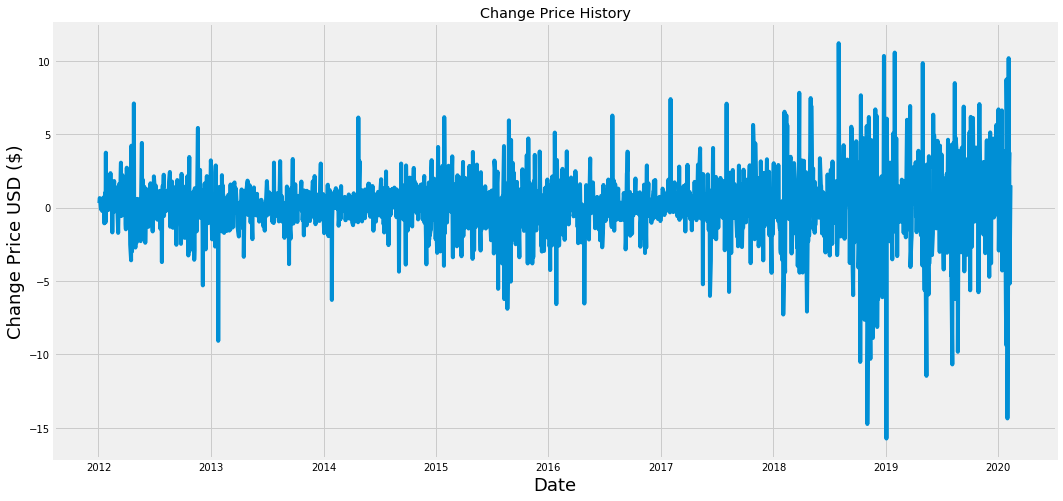

In [32]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Change Price History')
plt.plot(df['change'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Change Price USD ($)', fontsize=18)
plt.show()

In [35]:
df['change'][2009:2039].sum()

31.639984130859375

/Users/jongwon/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


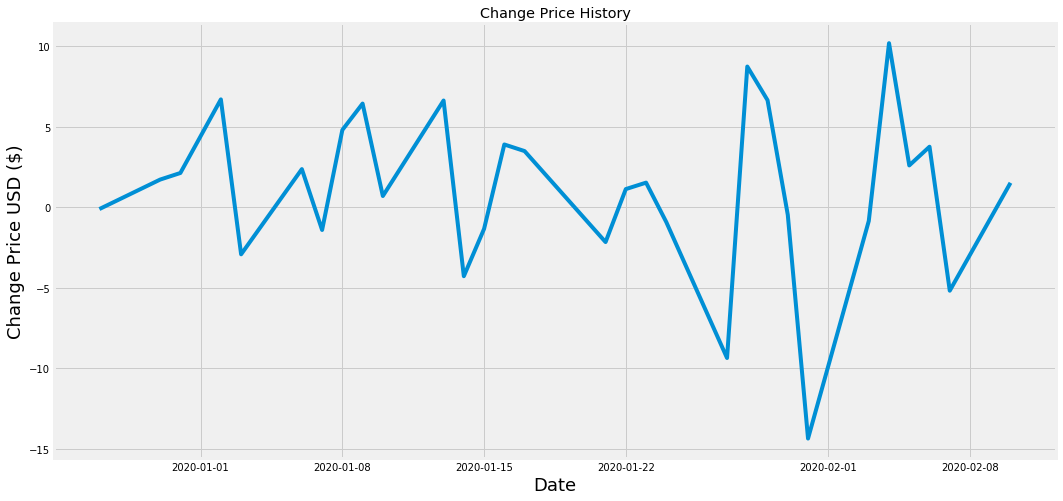

In [5]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Change Price History')
plt.plot(df['change'][2009:2039])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Change Price USD ($)', fontsize=18)
plt.show()

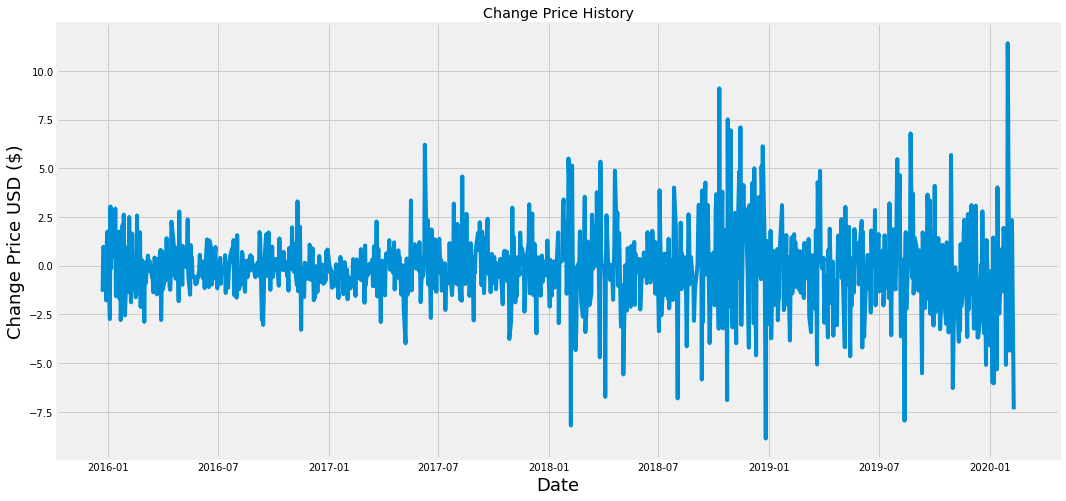

In [19]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Change Price History')
plt.plot(df['change'][1000:2039])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Change Price USD ($)', fontsize=18)
plt.show()

In [31]:
df['change'].sum()

262.8028450012207

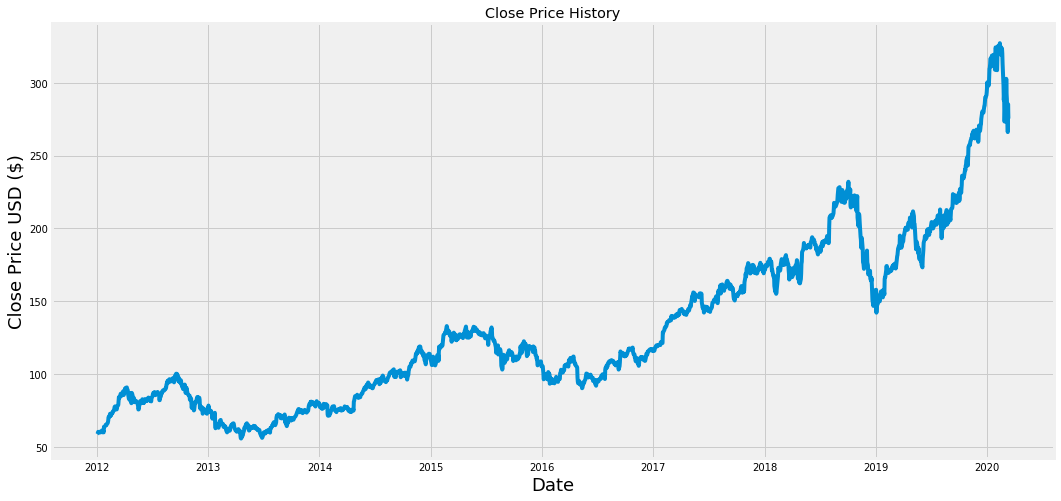

In [6]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
from bs4 import BeautifulSoup
import requests

In [ ]:
'https://www.google.com/search?q=nasdaq+AAPL&tbs=cdr:1,cd_min:11/1/2019,cd_max:11/2/2019&tbm=nws&sxsrf=ACYBGNStVMKQzPDpy1G8q4FpUlJV_VAzzw:1581417878190&ei=loVCXrCYC_CntgX0iKioDA&start=0&sa=N&ved=0ahUKEwiwu_vWqMnnAhXwk60KHXQECsU4KBDy0wMISA&biw=1440&bih=712&dpr=2'

In [45]:
def sentiment(url):
    url = url

    # Make a GET request to fetch the raw HTML content
    html_content = requests.get(url).text

    # Parse the html content
    soup = BeautifulSoup(html_content, "lxml")

    headline = soup.find('h1', class_='article-header__headline').text
    content = soup.find('div', class_='body__content').text
    # print(article.prettify()) # print the parsed data of html
    # print(headline)
    # print(content)

    obj = TextBlob(content)
    sentiment = obj.sentiment.polarity
    return(sentiment)

In [46]:
sentiment("https://www.nasdaq.com/articles/why-investors-are-paying-a-premium-for-apple-2019-11-02")

0.2021020646020646

In [64]:
df['Close'][1]

59.06285858154297

In [56]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-05,299.549988,291.410004,295.519989,292.920013,46893200.0,292.920013
2020-03-06,290.820007,281.230011,282.000000,289.029999,56544200.0,289.029999
2020-03-09,278.089996,263.000000,263.750000,266.170013,71686200.0,266.170013
2020-03-10,286.440002,269.369995,277.140015,285.339996,71322500.0,285.339996
2020-03-11,281.220001,271.859985,277.390015,275.429993,63899700.0,275.429993


In [47]:
import spacy

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = spacy.load("en_core_web_sm")

# Process whole documents
text = ("On top of better-than-expected demand for the iPhone 11, there are rumors that Apple will roll out a lower-priced iPhone similar to the iPhone 8 that will run on its newest A13 processor. That means users will get all the power needed to run Apple's apps and subscriptions, but in a smaller form factor with a cheaper price point. Observers are calling the device the iPhone SE2. It's expected to have a 4.7-inch screen and a price tag that may be around $350. Apple analyst Ming-Chi Kuo of TF International Securities predicts shipments could reach 30 million to 40 million units in 2020.")

doc = nlp(text)

# Analyze syntax
print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks])
print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])

# Find named entities, phrases and concepts
print("Find named entities, phrases and concepts")
for entity in doc.ents:
    print(entity.text, entity.label_)

Noun phrases: ['top', 'better-than-expected demand', 'the iPhone', 'rumors', 'Apple', 'a lower-priced iPhone', 'the iPhone', 'its newest A13 processor', 'users', 'all the power', "Apple's apps", 'subscriptions', 'a smaller form factor', 'a cheaper price point', 'Observers', 'the device', 'It', 'a 4.7-inch screen', 'a price tag', 'Apple analyst Ming-Chi Kuo', 'TF International Securities', 'shipments', '30 million to 40 million units']
Verbs: ['expect', 'will', 'roll', 'price', 'will', 'run', 'mean', 'will', 'need', 'run', 'call', 'expect', 'may', 'predict', 'could', 'reach']
Find named entities, phrases and concepts
the iPhone 11 EVENT
Apple ORG
iPhone ORG
the iPhone 8 LAW
A13 NORP
Apple ORG
the iPhone SE2 FAC
around $350 MONEY
Apple ORG
Ming-Chi Kuo PERSON
TF International Securities ORG
30 million to 40 million CARDINAL
2020 DATE


In [19]:
from textblob import TextBlob
import nltk

In [28]:
text = "Apple's (NASDAQ: AAPL) stock has been on a tear in recent weeks as the iPhone maker benefits from progress in trade negotiations between China and the ..."

In [31]:
text = "There was a lot to like in Apple's (NASDAQ: AAPL) fiscal fourth quarter. The company beat expectations for nearly every key metric, as total revenue growth ..."

In [32]:
obj = TextBlob(text)
sentiment = obj.sentiment.polarity

In [33]:
sentiment

0.025

In [22]:
neg_text = "bad wrong"

In [23]:
obj = TextBlob(neg_text)
sentiment = obj.sentiment.polarity
sentiment

-0.5999999999999999

In [60]:
df['change']

Date
2012-01-03          NaN
2012-01-04     0.315716
2012-01-05     0.655712
2012-01-06     0.624287
2012-01-09    -0.095715
2012-01-10     0.215714
2012-01-11    -0.098572
2012-01-12    -0.165714
2012-01-13    -0.225712
2012-01-17     0.698570
2012-01-18     0.630001
2012-01-19    -0.194286
2012-01-20    -1.064285
2012-01-23     1.015713
2012-01-24    -1.000000
2012-01-25     3.750000
2012-01-26    -0.290001
2012-01-27     0.378574
2012-01-30     0.818569
2012-01-31     0.495712
2012-02-01    -0.041428
2012-02-02    -0.152855
2012-02-03     0.651428
2012-02-06     0.612854
2012-02-07     0.694290
2012-02-08     1.121429
2012-02-09     2.355713
2012-02-10     0.035713
2012-02-13     1.311432
2012-02-14     0.979996
                ...    
2019-12-27    -0.110016
2019-12-30     1.720001
2019-12-31     2.130005
2020-01-02     6.700012
2020-01-03    -2.920013
2020-01-06     2.369995
2020-01-07    -1.409973
2020-01-08     4.799988
2020-01-09     6.440002
2020-01-10     0.699982
2020-01-13 